In [ ]:
Installing Libraries and dependencies

In [21]:
pip install textstat


   ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
   ------- ------------------------------- 20.5/105.1 kB 330.3 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/105.1 kB 393.8 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/105.1 kB 328.2 kB/s eta 0:00:01
   -------------------------------------- 105.1/105.1 kB 555.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.1 MB 3.3 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.1 MB 2.4 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.1 MB 2.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.1 MB 2.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/2.1 MB 2.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/2.1 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.7/2.1 MB 2.1 MB/s eta 0:00:01
   -----

In [5]:
pip install pandas numpy scikit-learn xgboost textblob nltk matplotlib seaborn openpyxl


In [37]:
# Resume Screening with Machine Learning

## Step 1: Load the Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')

# Load the dataset
file_path = "C:\\Users\\bjeev\\Downloads\\Aidata.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript
0,0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,620
1,1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,687
2,2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,511
3,3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,748
4,4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,541


In [ ]:
## Step 2: Feature Engineering
We extract the following features:
1. Resume-JD Similarity: Measures alignment between resume and job description using cosine similarity.
2. Resume-Transcript Similarity: Measures alignment between resume and transcript.
3. Sentiment Analysis: Analyzes sentiment polarity of transcripts.
4. Length and Diversity Scores: Extracts word counts and lexical diversity.


In [15]:
# Feature Engineering
def calculate_cosine_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

df['resume_jd_similarity'] = df.apply(lambda row: calculate_cosine_similarity(row['Resume'], row['Job Description']), axis=1)
df['resume_transcript_similarity'] = df.apply(lambda row: calculate_cosine_similarity(row['Resume'], row['Transcript']), axis=1)

# Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['transcript_sentiment'] = df['Transcript'].apply(get_sentiment)

# Length and Diversity
df['transcript_length'] = df['Transcript'].apply(lambda x: len(x.split()))
df['resume_length'] = df['Resume'].apply(lambda x: len(x.split()))

def lexical_diversity(text):
    tokens = nltk.word_tokenize(text)
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

df['resume_diversity'] = df['Resume'].apply(lexical_diversity)
df['transcript_diversity'] = df['Transcript'].apply(lexical_diversity)

# Encode the target column
df['decision_encoded'] = LabelEncoder().fit_transform(df['decision'])

df.head()


,Unnamed: 0,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript,resume_jd_similarity,resume_transcript_similarity,transcript_sentiment,transcript_length,resume_length,resume_diversity,transcript_diversity,decision_encoded
0,0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,620,0.251458,0.232282,0.107568,620,312,0.461942,0.358289,1
1,1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,687,0.219177,0.187723,0.091728,687,331,0.495238,0.362780,1
2,2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,511,0.356183,0.357967,0.060836,511,338,0.438679,0.309006,0
3,3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,748,0.325579,0.216645,0.100418,748,329,0.498759,0.317546,1
4,4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,541,0.306289,0.200212,0.042577,541,409,0.451020,0.336648,0


In [ ]:
ABOUT FEATURES

TF-IDF Features of Resume, Job Description, and Transcript
Extract top n TF-IDF scores for important terms.

Keyword Match Counts
Count how many specific keywords (e.g., "skills", "experience") from the job description appear in the resume or transcript.

Named Entity Recognition (NER)
Extract counts or presence of entities like skills, organizations, and locations from the text.

Unique Word Ratio
Ratio of unique words to the total number of words in each column.

Bigram Similarity
Use bigram (2-word sequences) similarity for Resume vs. Job Description and Resume vs. Transcript.

Readability Scores
Compute readability metrics like Flesch Reading Ease or Gunning Fog Index for Transcript.

Stopword Ratio
Percentage of stopwords in Transcript, Resume, or Job Description.

POS Tag Distribution
Part-of-speech (POS) tag distribution (e.g., counts of nouns, verbs, adjectives).

Question Count in Transcript
Count how many questions are present in the Transcript (indicates interaction level).

Word Embedding Similarity
Use pre-trained word embeddings (e.g., Word2Vec, GloVe) to calculate semantic similarity.


In [23]:
import nltk
from nltk.corpus import stopwords
from textstat import flesch_reading_ease, gunning_fog
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# 1. TF-IDF Features
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)  # Extract top 50 features
tfidf_matrix = vectorizer.fit_transform(df['Resume'] + " " + df['Job Description'])
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_features.columns = [f'tfidf_{col}' for col in tfidf_features.columns]
df = pd.concat([df, tfidf_features], axis=1)

# 2. Keyword Match Counts
keywords = ['skills', 'experience', 'education', 'project']
for keyword in keywords:
    df[f'resume_keyword_{keyword}'] = df['Resume'].apply(lambda x: x.lower().count(keyword))
    df[f'transcript_keyword_{keyword}'] = df['Transcript'].apply(lambda x: x.lower().count(keyword))

# 3. Unique Word Ratio
df['resume_unique_ratio'] = df['Resume'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)
df['transcript_unique_ratio'] = df['Transcript'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)

# 4. Readability Scores
df['transcript_readability'] = df['Transcript'].apply(lambda x: flesch_reading_ease(x) if len(x.split()) > 0 else 0)
df['transcript_gunning_fog'] = df['Transcript'].apply(lambda x: gunning_fog(x) if len(x.split()) > 0 else 0)

# 5. Stopword Ratio
stop_words = set(stopwords.words('english'))
df['resume_stopword_ratio'] = df['Resume'].apply(
    lambda x: sum(1 for word in nltk.word_tokenize(x.lower()) if word in stop_words) / len(nltk.word_tokenize(x)) if len(x) > 0 else 0
)
df['transcript_stopword_ratio'] = df['Transcript'].apply(
    lambda x: sum(1 for word in nltk.word_tokenize(x.lower()) if word in stop_words) / len(nltk.word_tokenize(x)) if len(x) > 0 else 0
)

# 6. Part-of-Speech (POS) Tag Distribution
def get_pos_distribution(text, pos_tag):
    words = nltk.word_tokenize(text.lower())
    pos_tags = nltk.pos_tag(words)
    return sum(1 for word, tag in pos_tags if tag.startswith(pos_tag)) / len(pos_tags) if len(pos_tags) > 0 else 0

df['resume_noun_ratio'] = df['Resume'].apply(lambda x: get_pos_distribution(x, 'NN'))
df['transcript_verb_ratio'] = df['Transcript'].apply(lambda x: get_pos_distribution(x, 'VB'))

# 7. Question Count in Transcript
df['transcript_question_count'] = df['Transcript'].apply(lambda x: x.count('?'))

# 8. Bigram Similarity
def calculate_bigram_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

df['bigram_resume_jd_similarity'] = df.apply(lambda row: calculate_bigram_similarity(row['Resume'], row['Job Description']), axis=1)

# Inspect the new features
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bjeev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bjeev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


   Unnamed: 0         ID          Name               Role  \
0           0  brenbr359   brent brown    product manager   
1           1  jameay305   james ayala  software engineer   
2           2  scotri565  scott rivera      data engineer   
3           3  emilke232   emily kelly        ui engineer   
4           4  ashlra638    ashley ray     data scientist   

                                          Transcript  \
0  product manager interview transcript\n\ninterv...   
1  software engineer interview transcript\n\ninte...   
2  here is a simulated interview for scott rivera...   
3  interview transcript: emily kelly for ui engin...   
4  data scientist interview transcript\n\ncompany...   

                                              Resume decision  \
0  here's a sample resume for brent brown applyin...   select   
1  here's a sample resume for james ayala applyin...   select   
2  here's a sample resume for scott rivera applyi...   reject   
3  here's a sample resume for emily 

In [ ]:
Explanation of Features
TF-IDF Features: Captures the most important terms across documents.
Keyword Matches: Indicates alignment with job requirements.
Unique Word Ratio: High ratios imply varied vocabulary.
Readability Scores: Helps assess transcript complexity.
Stopword Ratio: Indicates verbosity or filler content.
POS Tag Ratios: Shows the distribution of parts of speech, e.g., noun-heavy resumes may emphasize content.
Question Count: Reflects candidate engagement during the interview.
Bigram Similarity: Captures semantic and contextual similarity at the phrase level.


In [ ]:
 next step FEATURE MATRIX

In [47]:
available_features = [
    col for col in [
        'resume_jd_similarity', 'resume_transcript_similarity', 'transcript_sentiment', 
        'transcript_length', 'resume_length', 'resume_diversity', 'transcript_diversity',
        'resume_unique_ratio', 'transcript_unique_ratio', 'transcript_readability',
        'transcript_gunning_fog', 'resume_stopword_ratio', 'transcript_stopword_ratio',
        'resume_noun_ratio', 'transcript_verb_ratio', 'transcript_question_count',
        'bigram_resume_jd_similarity'
    ] + [col for col in df.columns if col.startswith('tfidf_')] if col in df.columns
]


In [49]:
print("Using features:", available_features)


Using features: []


In [55]:

# Check if the 'decision' column exists
if 'decision' in df.columns:
    label_encoder = LabelEncoder()
    df['decision_encoded'] = label_encoder.fit_transform(df['decision'])
else:
    print("Error: The 'decision' column is missing from the DataFrame.")


In [61]:
X = df[available_features]
y = df['decision_encoded']


In [63]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description', 'num_words_in_transcript',
       'decision_encoded'],
      dtype='object')


In [65]:
print(df['decision'].unique())


['select' 'reject']


In [ ]:
Test_Train Split

In [27]:

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
DEFINING Models

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}


In [ ]:
HYPER PARAMETERS using GridsearchCV

In [31]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Train the model
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
EVALUATION 

In [33]:
best_models = {}

for model_name, model in models.items():
    # Create a pipeline for scaling and training
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Define hyperparameter grids for each model
    param_grid = {
        "Logistic Regression": {'logisticregression__C': [0.1, 1, 10]},
        "Decision Tree": {'decisiontreeclassifier__max_depth': [None, 10, 20]},
        "Random Forest": {'randomforestclassifier__n_estimators': [100, 200]},
        "XGBoost": {'xgbclassifier__learning_rate': [0.01, 0.1]},
        "SVM": {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
    }.get(model_name, {})
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\bjeev\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'logisticregression__C': 10}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 10}
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters for Random Forest: {'randomforestclassifier__n_estimators': 100}
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\bjeev\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:47:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'xgbclassifier__learning_rate': 0.01}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for SVM: {'svc__C': 1, 'svc__kernel': 'linear'}


In [39]:
for model_name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\n{model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.7731
ROC-AUC: 0.9110
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       174
           1       0.75      0.79      0.77       161

    accuracy                           0.77       335
   macro avg       0.77      0.77      0.77       335
weighted avg       0.77      0.77      0.77       335


Decision Tree
Accuracy: 0.8209
ROC-AUC: 0.8786
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       174
           1       0.85      0.76      0.80       161

    accuracy                           0.82       335
   macro avg       0.82      0.82      0.82       335
weighted avg       0.82      0.82      0.82       335


Random Forest
Accuracy: 0.7910
ROC-AUC: 0.9154
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       174
           1       0.77      0.81      0.79       161

    accuracy                    

In [ ]:
ROC_CURVE

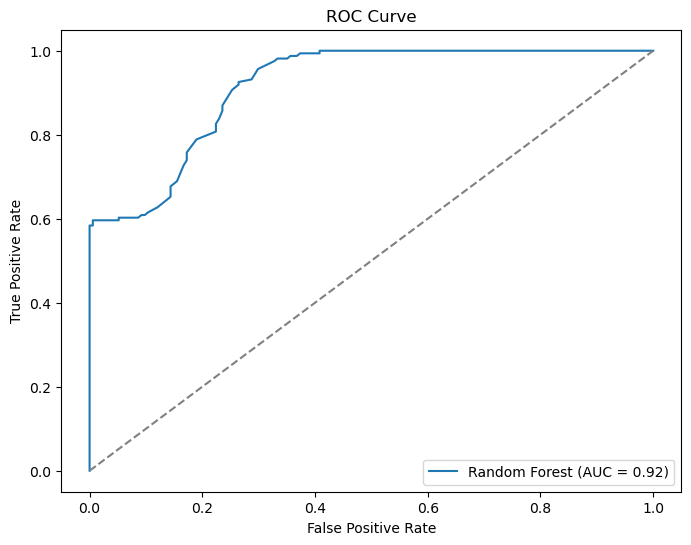

In [41]:
from sklearn.metrics import roc_curve

# Example: ROC curve for the best model
y_pred_proba = best_models['Random Forest'].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
